# Question 1 : Pas de changement : Le réchauffement climatique est un mythe.



In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
from matplotlib import style 
style.use('ggplot') or plt.style.use('ggplot')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data set sea temperature

In [0]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/11FV0d8LMwoK-xx-sXD_SjRxI_fX0tLVlQvpSUHOBNl8/edit#gid=913758662')

In [0]:
sheet = wb.worksheet('Sea_temp')

In [0]:
data = sheet.get_all_values()

In [0]:
df = pd.DataFrame(data)

In [9]:
df.shape

(137, 4)

In [10]:
df.head()

0  ...                              3
0  Year  ...  Upper 95% confidence interval
1  1880  ...                   -0.267371339
2  1881  ...                   -0.153169257
3  1882  ...                   -0.169594227
4  1883  ...                   -0.246082136

[5 rows x 4 columns]

### Nettoyage des données

In [0]:
df.columns = df.iloc[0]
df = df.iloc[1:]
df.reset_index(drop=True, inplace=True)

In [12]:
df.head()

0  Year  ... Upper 95% confidence interval
0  1880  ...                  -0.267371339
1  1881  ...                  -0.153169257
2  1882  ...                  -0.169594227
3  1883  ...                  -0.246082136
4  1884  ...                  -0.389029512

[5 rows x 4 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Year                           136 non-null    object
 1   Annual anomaly                 136 non-null    object
 2   Lower 95% confidence interval  136 non-null    object
 3   Upper 95% confidence interval  136 non-null    object
dtypes: object(4)
memory usage: 4.4+ KB


In [0]:
# Modification nom colonne
df = df.rename(columns={'Annual anomaly': 'Annual_anomaly'})


In [15]:
df.head()

0  Year  ... Upper 95% confidence interval
0  1880  ...                  -0.267371339
1  1881  ...                  -0.153169257
2  1882  ...                  -0.169594227
3  1883  ...                  -0.246082136
4  1884  ...                  -0.389029512

[5 rows x 4 columns]

In [0]:
# object to float
df['Annual_anomaly'] = pd.to_numeric(df['Annual_anomaly'], errors='coerce')

In [0]:
# suppression colonnes
df.drop(['Lower 95% confidence interval', 'Upper 95% confidence interval'], axis = 1, inplace = True)


In [18]:
df.head()

0  Year  Annual_anomaly
0  1880       -0.470009
1  1881       -0.356879
2  1882       -0.372661
3  1883       -0.448443
4  1884       -0.589754

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            136 non-null    object 
 1   Annual_anomaly  136 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [20]:
# Somme des données nulles in dataframe
df.isna().sum()

0
Year              0
Annual_anomaly    0
dtype: int64

In [21]:
df.describe()

0      Annual_anomaly
count      136.000000
mean        -0.320738
std          0.471823
min         -1.189773
25%         -0.663763
50%         -0.433238
75%          0.052117
max          0.935577

In [22]:
df.head()

0  Year  Annual_anomaly
0  1880       -0.470009
1  1881       -0.356879
2  1882       -0.372661
3  1883       -0.448443
4  1884       -0.589754

### Visualisation des Données

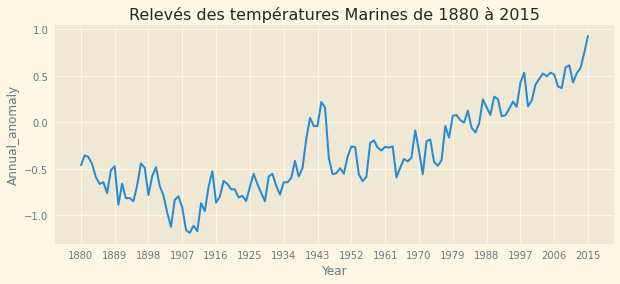

In [25]:
# Visualisation avec seaborn

with plt.style.context('Solarize_Light2'):
  fig, ax = plt.subplots(0,0, figsize=(10, 4))
  sns.lineplot(x='Year', y='Annual_anomaly', data = df, linewidth=2).set_title('Relevés des températures Marines de 1880 à 2015')

plt.xticks(df["Year"][::9], df["Year"][::9])
plt.show()

fig.savefig("EvolTempSea.png")



### Export CSV

In [0]:
df.to_csv('exportMergeTempSeaGlobal.csv', index = False)
